In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Historical Data

In [2]:
!dir "../csv/round-3-island-data-bottle"

 Volume in drive C is Windows
 Volume Serial Number is 4C9C-5B8B

 Directory of C:\Users\joshu\Documents\Code\prosperity2\csv\round-3-island-data-bottle

2024-04-15  09:41 PM    <DIR>          .
2024-04-15  09:41 PM    <DIR>          ..
2024-04-15  09:41 PM         2,621,062 prices_round_3_day_0.csv
2024-04-15  09:41 PM         2,620,447 prices_round_3_day_1.csv
2024-04-15  09:41 PM         2,620,492 prices_round_3_day_2.csv
2024-04-15  09:41 PM           152,390 trades_round_3_day_0_nn.csv
2024-04-15  09:41 PM           146,572 trades_round_3_day_1_nn.csv
2024-04-15  09:41 PM           150,193 trades_round_3_day_2_nn.csv
               6 File(s)      8,311,156 bytes
               2 Dir(s)  44,372,992,000 bytes free


In [3]:
days = [0, 1, 2]
pricesByDay = {}
tradesByDay = {}

for day in days:
    pricesByDay[day] = pd.read_csv(f"../csv/round-3-island-data-bottle/prices_round_3_day_{day}.csv", sep=';')
    tradesByDay[day] = pd.read_csv(f"../csv/round-3-island-data-bottle/trades_round_3_day_{day}_nn.csv", sep=';')

In [4]:
pricesByDay[0].head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0


In [5]:
tradesByDay[0].head()

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,NaN,NaN,CHOCOLATE,SEASHELLS,8001.0,8
1,0,NaN,NaN,ROSES,SEASHELLS,15001.0,3
2,200,NaN,NaN,ROSES,SEASHELLS,15000.0,3
3,500,NaN,NaN,STRAWBERRIES,SEASHELLS,3999.0,10
4,1000,NaN,NaN,GIFT_BASKET,SEASHELLS,71360.0,2


## Prices

### Bid Price

In [12]:
def plot_bid_prices(product):
    fig, ax = plt.subplots(nrows=3, figsize=(15, 25))

    for i in range(3):
        day = days[i]
        ax[i].set_title(f"Bid prices for {product} on day {day}")
        dfPrices = pricesByDay[day][lambda df: df['product'] == product]
        for colName in ['bid_price_1', 'bid_price_2', 'bid_price_3']:
            ax[i].scatter(dfPrices['timestamp'], dfPrices[colName])
            
def plot_ask_prices(product):
    fig, ax = plt.subplots(nrows=3, figsize=(15, 25))

    for i in range(3):
        day = days[i]
        ax[i].set_title(f"Ask prices for {product} on day {day}")
        dfPrices = pricesByDay[day][lambda df: df['product'] == product]
        for colName in ['ask_price_1', 'ask_price_2', 'ask_price_3']:
            ax[i].scatter(dfPrices['timestamp'], dfPrices[colName])

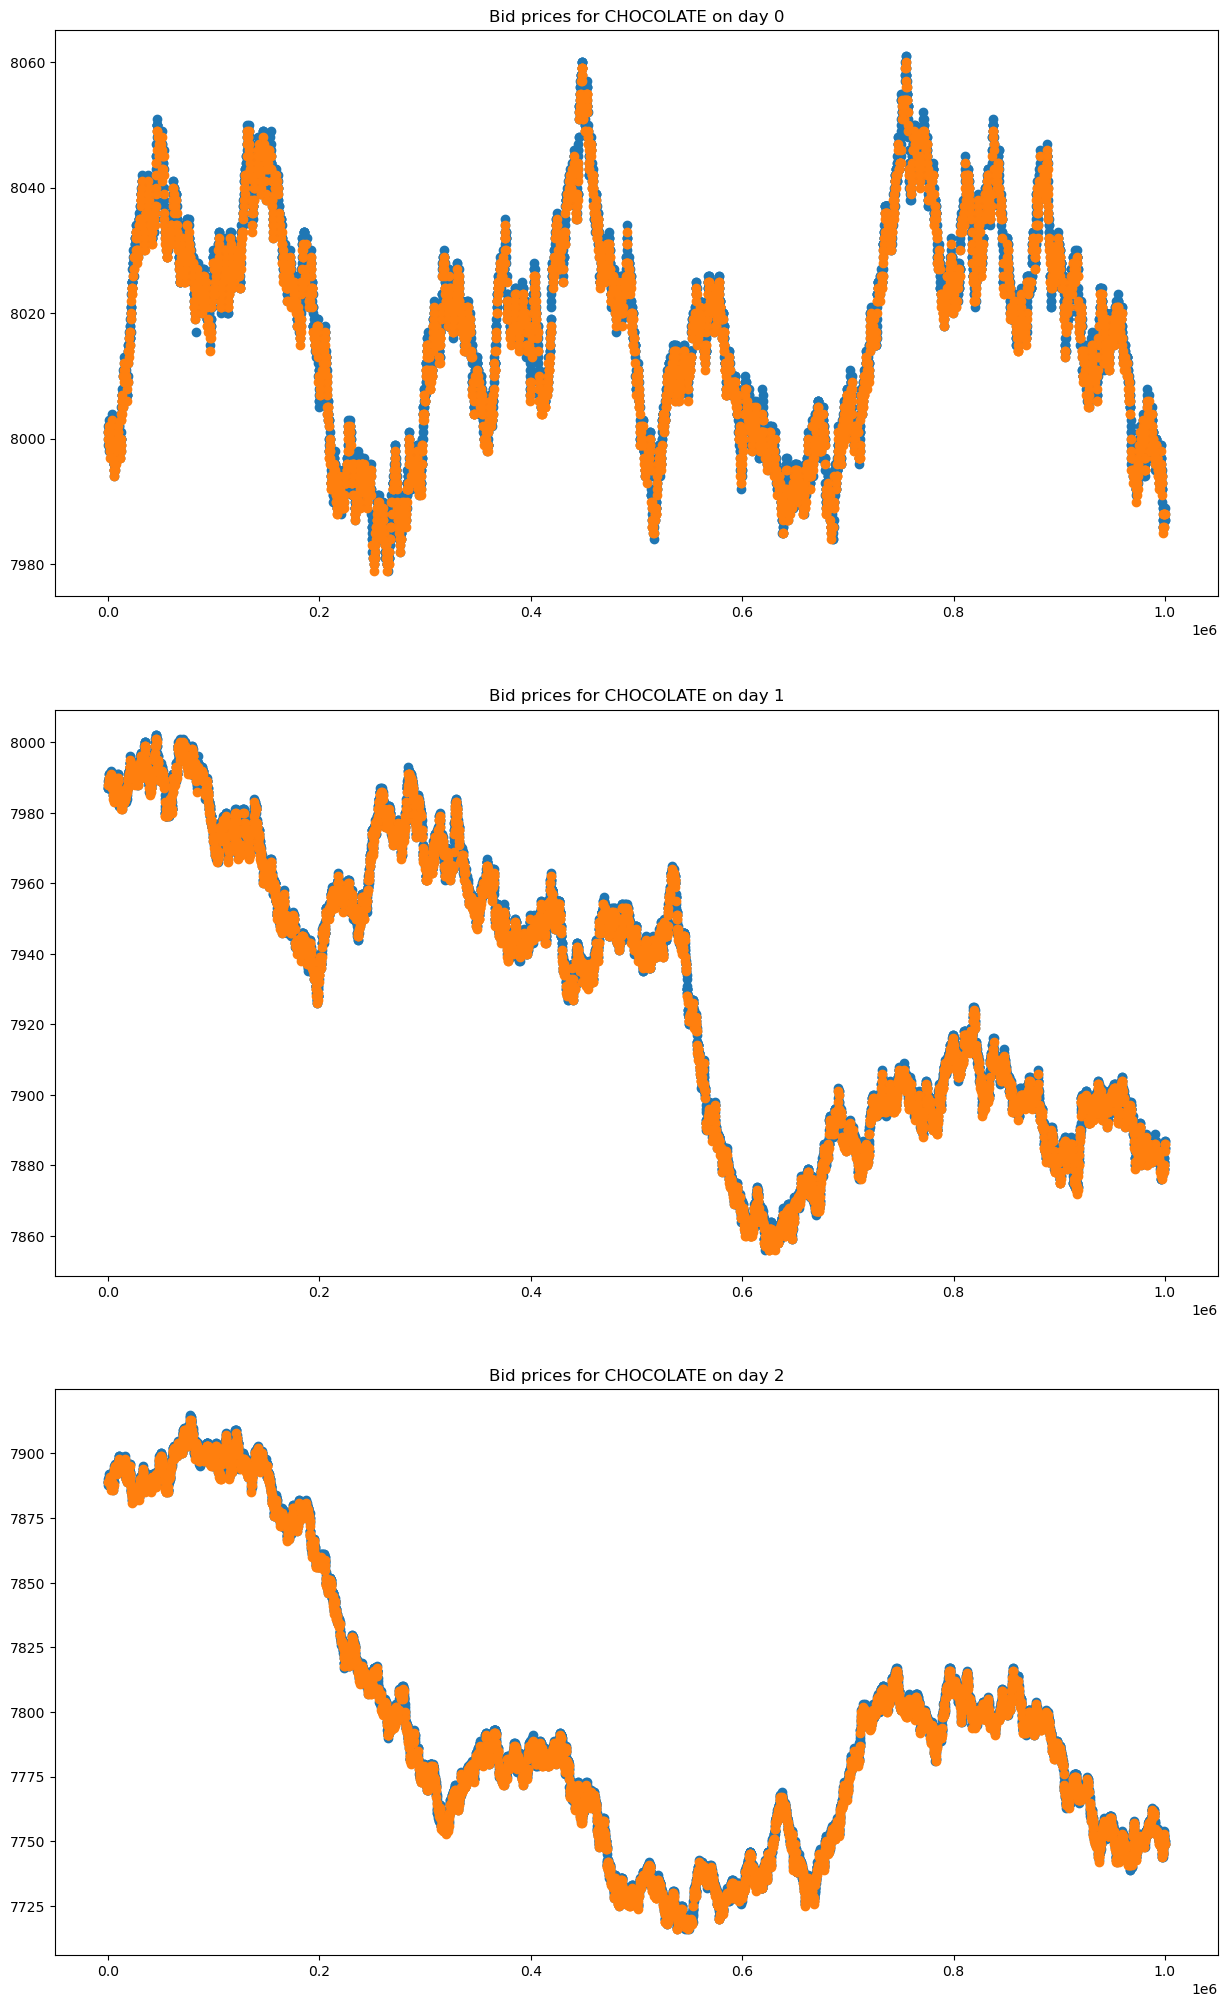

In [13]:
plot_bid_prices('CHOCOLATE')

### Ask Price

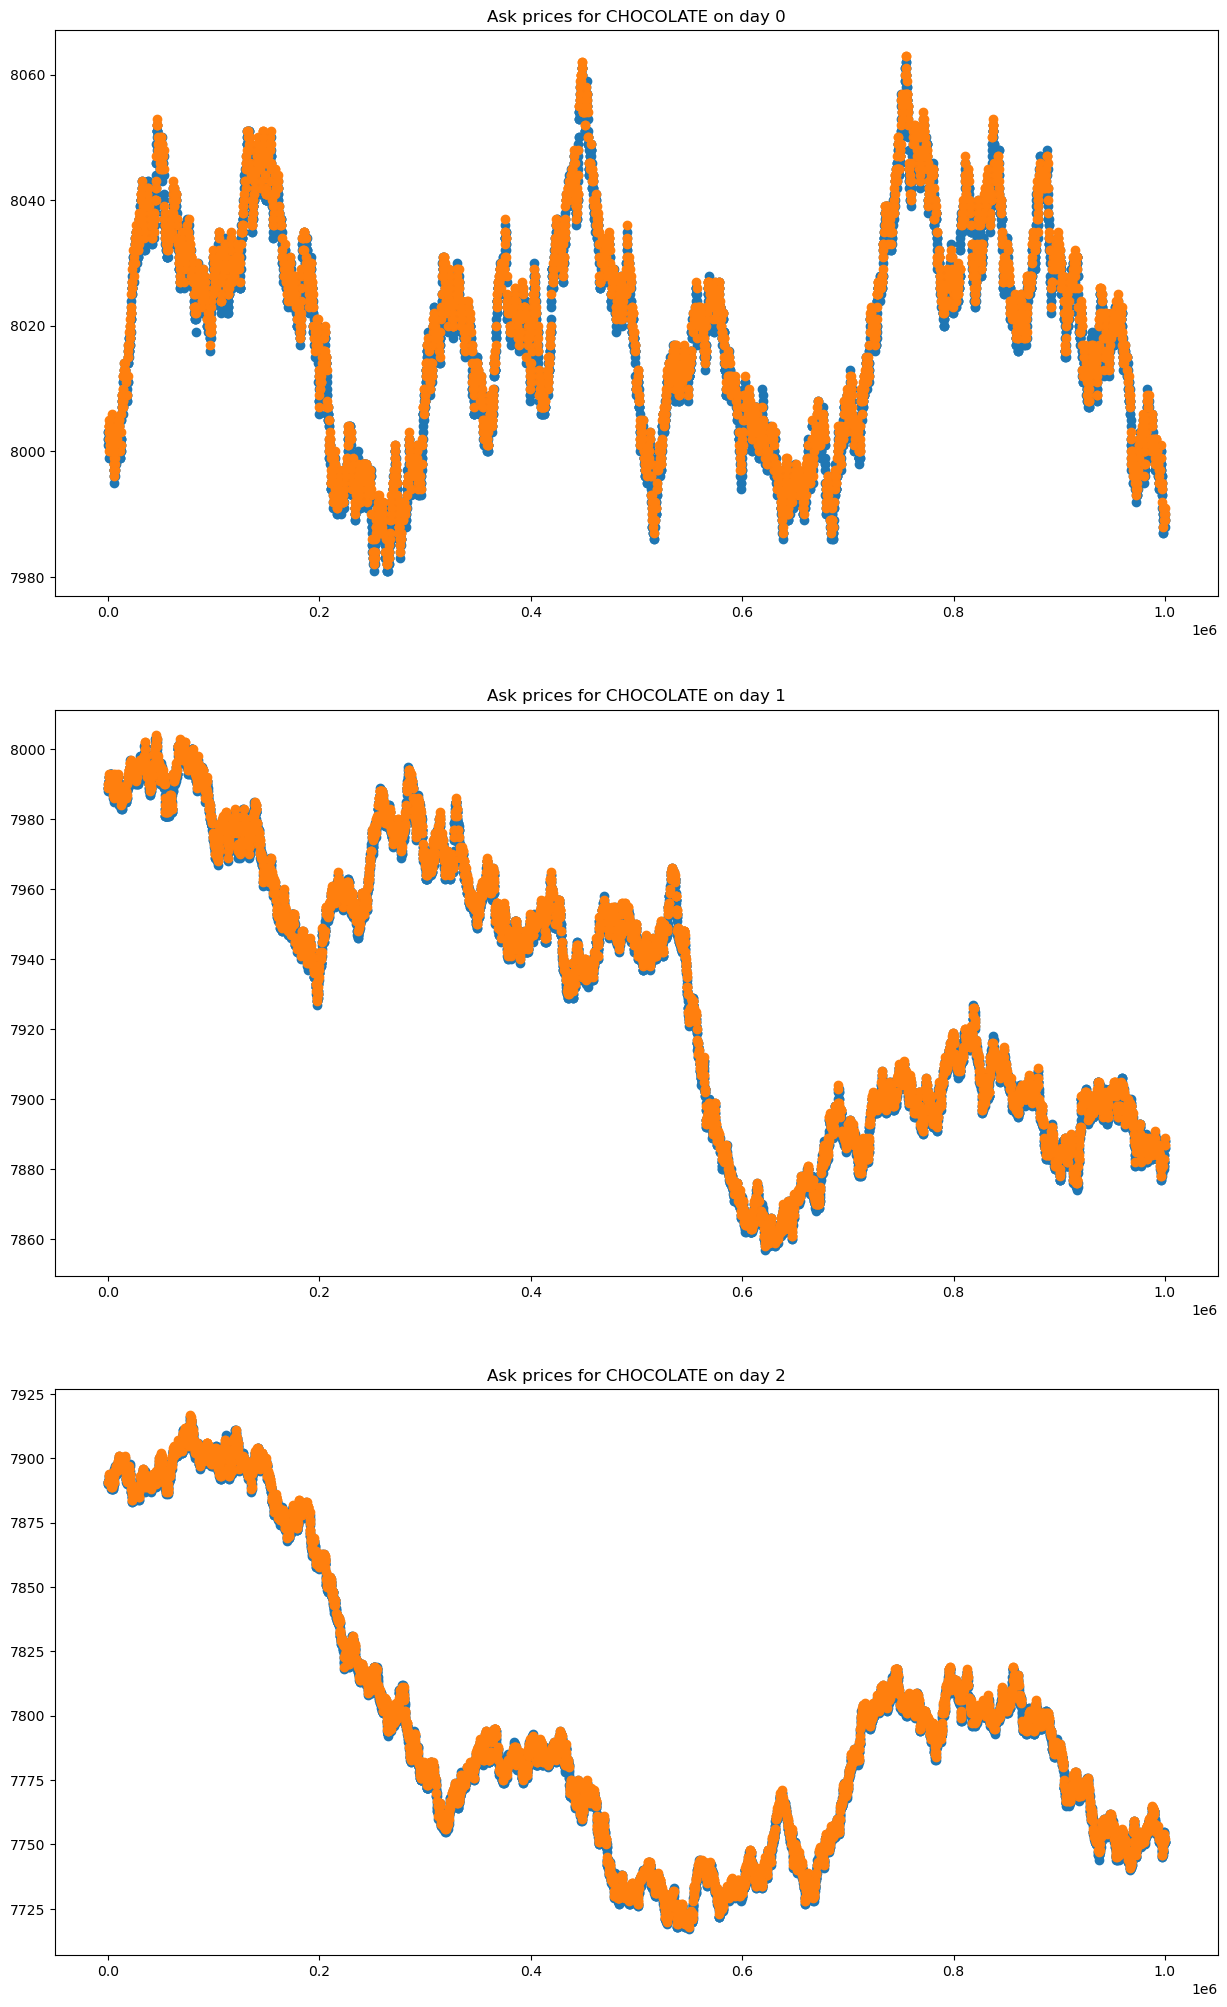

In [14]:
plot_ask_prices('CHOCOLATE')

## Trades